<a href="https://colab.research.google.com/github/Jheel-patel/Deep-Learning-Cats-Dogs/blob/master/Code_Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Connect to google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Copy data to local drive

In [0]:
import os, shutil

!mkdir 'data'
!mkdir 'data/training_set'
!mkdir 'data/validation_set'
!mkdir 'data/training_set/cats' 
!mkdir 'data/training_set/dogs' 
!mkdir 'data/validation_set/cats' 
!mkdir 'data/validation_set/dogs'


source_data_dir = '/content/drive/My Drive/3.Projects/Cats and Dogs/train'

#if os.listdir('data/training_set/cats')==[]:
for file in ['cat.{}.jpg'.format(i) for i in range(2000)]:
        shutil.copyfile(os.path.join(source_data_dir,file),os.path.join("data/training_set/cats",file))

In [0]:
for file in ['dog.{}.jpg'.format(i) for i in range(2000)]:
        shutil.copyfile(os.path.join(source_data_dir,file),os.path.join("data/training_set/dogs",file))

In [0]:
for file in ['cat.{}.jpg'.format(i) for i in range(2000,2500)]:
        shutil.copyfile(os.path.join(source_data_dir,file),os.path.join("data/validation_set/cats",file))

In [0]:
for file in ['dog.{}.jpg'.format(i) for i in range(2000,2500)]:
        shutil.copyfile(os.path.join(source_data_dir,file),os.path.join("data/validation_set/dogs",file))

#Count number of images

In [6]:

path, dirs, train_cat_files = next(os.walk("data/training_set/cats"))
path, dirs, train_dog_files = next(os.walk("data/training_set/dogs"))
path, dirs, val_cat_files = next(os.walk("data/validation_set/cats"))
path, dirs, val_dog_files = next(os.walk("data/validation_set/dogs"))

num_cats_tr = len(train_cat_files)
num_dogs_tr = len(train_dog_files)

num_cats_val = len(val_cat_files)
num_dogs_val = len(val_dog_files)

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val
total_train , total_val

(4000, 1000)

#Import Library

In [0]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Data Preprocessing

In [12]:
IMG_SHAPE=150
BATCH_SIZE=40


train_dir='data/training_set'
validation_dir ='data/validation_set'
#Augmented Image

image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#Create and train model

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


epochs=100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

#Result Visualisation

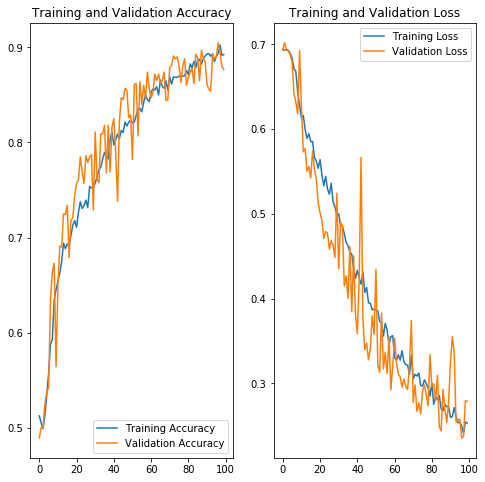

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Using Pre Trained Inception Resent V2 Network

In [0]:
from tensorflow.keras.applications import incepti